In [54]:
from connection import MySQLConnection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

new_connection = MySQLConnection()

# Data overview
# SQL query of first 3 rows from the data set to show the data structure
q = ('SELECT * FROM DOHMH_New_York_City_Restaurant_Inspection_Results LIMIT 999999;')

# Convert the SQL query to Pandas DataFrame
r = pd.read_sql(q,  new_connection.con)
print('DATA STRUCTURE PREVIEW')
r.head(3)

DATA STRUCTURE PREVIEW


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50106689,VIVI BUBBLE TEA,Manhattan,50,LEXINGTON AVE,10010,6465906001,Coffee/Tea,09/22/2021,Violations were cited in the following area(s).,...,05/03/2022,Pre-permit (Operational) / Initial Inspection,40.740433,-73.984302,105,02,006800,1018071,1008800019,MN21
1,50062872,LUCKY EASTERN,Queens,1446,COLLEGE POINT BLVD,11356,7188880069,Chinese,03/16/2018,Violations were cited in the following area(s).,...,05/03/2022,Cycle Inspection / Re-inspection,40.784746,-73.845797,407,19,092900,4098221,2147483647,QN23
2,50096095,THE GULLY,Queens,2545,STEINWAY ST,11103,3472642205,Indian,03/03/2020,Violations were cited in the following area(s).,...,05/03/2022,Pre-permit (Operational) / Re-inspection,40.767543,-73.912003,401,22,014300,4011384,2147483647,QN70


In [21]:
# Total number of records in the dataset
q1 = ('SELECT count(CAMIS) as `TOTAL NUMBER OF RECORDS` FROM DOHMH_New_York_City_Restaurant_Inspection_Results;')

# Convert the SQL query to Pandas DataFrame
r1 = pd.read_sql(q1,  new_connection.con)
r1

,TOTAL NUMBER OF RECORDS
0,301194


<AxesSubplot:title={'center':'Percentage of restaurants per boro'}, ylabel='NUMBER OF RESTAURANTS'>

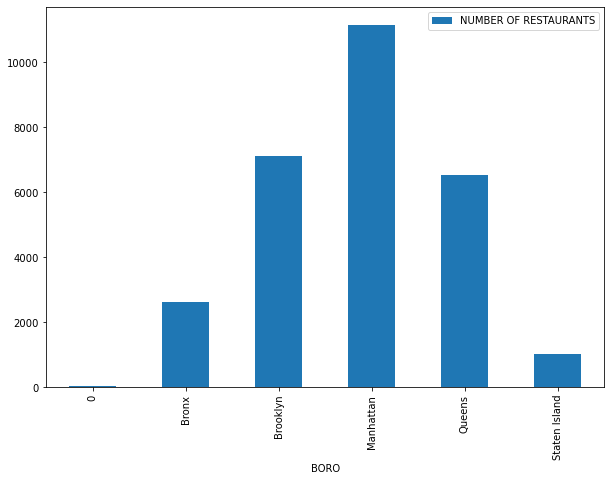

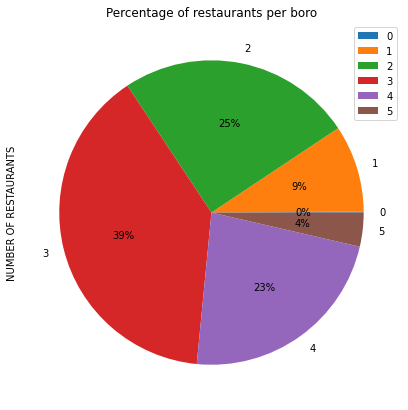

In [52]:
# SQL query of number of restaurants per borough
q2 = (
      'SELECT count(DISTINCT CAMIS) as `NUMBER OF RESTAURANTS`, BORO FROM DOHMH_New_York_City_Restaurant_Inspection_Results  group by BORO LIMIT 999999;'
      )

# Convert the SQL query to Pandas Datarame
r2 = pd.read_sql(q2, new_connection.con)
r2.head(5)
# Plotting orders by time data 
r2.plot.bar(x='BORO', y='NUMBER OF RESTAURANTS', figsize=(10,7));
r2.plot(kind='pie', y='NUMBER OF RESTAURANTS',figsize=(10,7),autopct='%1.0f%%', title='Percentage of restaurants per boro')

Text(0.5, 1.0, 'Overall Grade Distribution by Borough')

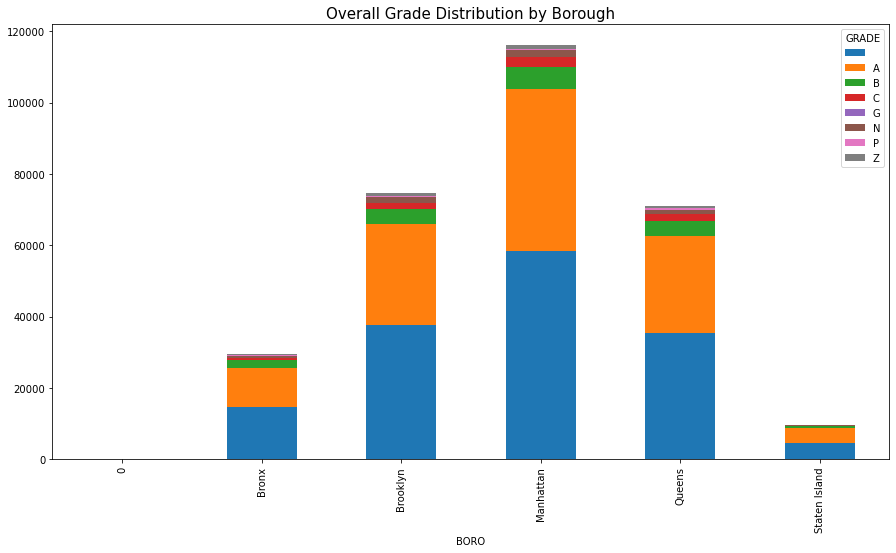

In [57]:
pd.crosstab(r.BORO, data.GRADE).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Overall Grade Distribution by Borough', fontsize = 15)

Text(0.5, 1.0, 'Distribution Plot of the Scores')

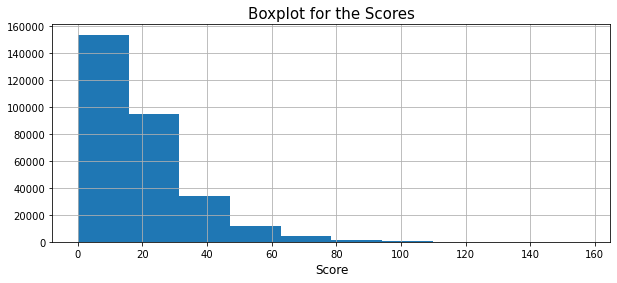

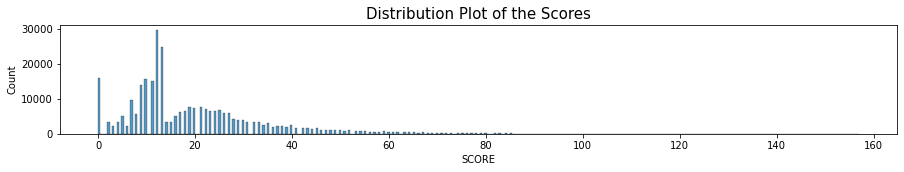

In [5]:

 # SQL query of Total Number of Records taken from NYC Data
 # SQL query of scores
q3 = (
      'SELECT SCORE FROM DOHMH_New_York_City_Restaurant_Inspection_Results LIMIT 9999999;'
      )
r3 = pd.read_sql(q3,  new_connection.con)
r3
# Plot a histogram
r3.SCORE.hist(figsize=(10,4))
plt.title("Boxplot for the Scores", fontsize=15)
plt.xlabel('Score', fontsize = 12)

fig, ax = plt.subplots()
fig.set_size_inches(15, 2)
sns.histplot(r3.SCORE.dropna())
plt.title("Distribution Plot of the Scores", fontsize=15)